<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_18_Matplotlib Box Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [42]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Data Scientist Hourly Salary Box Plot (2.18.1)

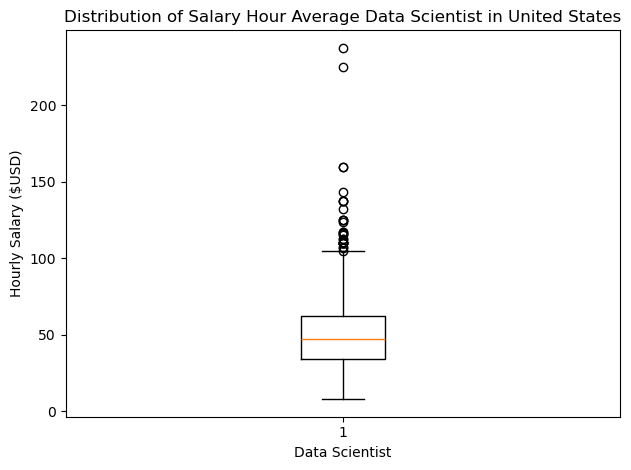

In [23]:
# Problem Statement:
# Create a box plot to visualize the distribution of salary_hour_avg for Data Scientist job postings in the United States. 
# Label the x-axis as 'Data Scientist' and the y-axis as 'Hourly Salary ($USD)'.
df_dropped=df.dropna(subset='salary_hour_avg').copy()
df_ds_us=df_dropped[df_dropped.job_country.isin(['United States']) & df_dropped.job_title_short.isin(['Data Scientist'])]
df_list=df_ds_us.salary_hour_avg.to_list()
plt.boxplot(df_list,vert=True)
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Distribution of Salary Hour Average Data Scientist in United States')

plt.tight_layout()
plt.show()

---

## 🟨 Comparison of Hourly Salaries for Data Analyst (2.18.2)

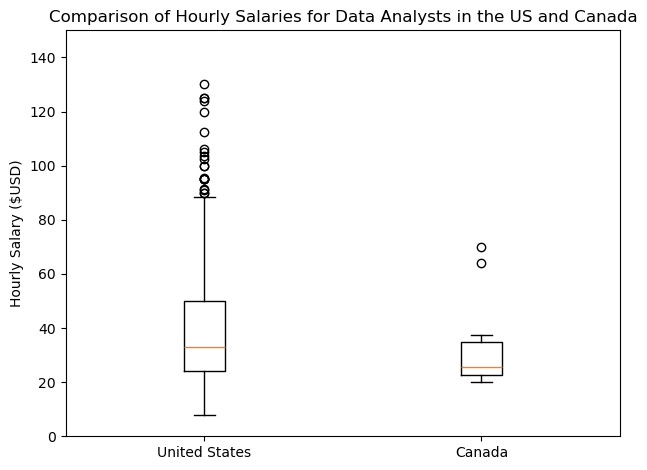

In [45]:
# Problem Statement:
# Create a box plot to compare the distribution of salary_hour_avg for Data Analyst job postings in the United States and Canada.

# Filter a DataFrame to include only 'Data Analyst' roles in these two countries.
# Use list comprehension to create a list of DataFrames for each country.
# Use the plt.boxplot() function to plot this list and specify the labels as countries.
# Set the y-axis limit to 150 and the y-axis as 'Hourly Salary ($USD)'.
# Code Needed
countries = ['United States', 'Canada']
df_dropped=df.dropna(subset='salary_hour_avg').copy()
df_da_us=df_dropped[df_dropped.job_country.isin(['United States']) & df_dropped.job_title_short.isin(['Data Analyst'])]
df_da_ca=df_dropped[df_dropped.job_country.isin(['Canada']) & df_dropped.job_title_short.isin(['Data Analyst'])]
df_list=[df_da_us.salary_hour_avg.to_list(),df_da_ca.salary_hour_avg.to_list()]
plt.boxplot(df_list,tick_labels=['United States','Canada'])
plt.ylim(0,150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.ylabel('Hourly Salary ($USD)')
plt.tight_layout()
plt.show()



---

## 🟥 Comparison of Hourly Salaries in Canada (2.18.3)

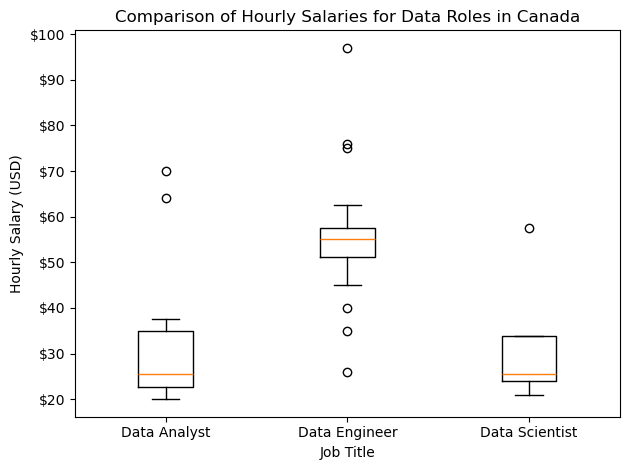

In [75]:
# Problem Statement:
# Create a box plot to compare the distribution of salary_hour_avg for Data Analyst, Data Engineer, and Data Scientist job postings in Canada.
# Label the x-axis as 'Job Title' and format the y-axis to have '$' before the number then label it as 'Hourly Salary (USD)'.
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']



df_ca=df[df.job_country.isin(['Canada'])].copy()
df_ca=df_ca.dropna(subset='salary_hour_avg')
df_filtered=df_ca[df_ca.job_title_short.isin(job_titles)]
df_f=[df_filtered[df_filtered.job_title_short==x]['salary_hour_avg'] for x in job_titles]
plt.boxplot(df_f,tick_labels=job_titles)
plt.xlabel('Job Title')
plt.ylabel('Hourly Salary (USD)')
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
plt.title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.tight_layout()
plt.show()
# plt.boxplot()

---